In [1]:
import pandas as pd
import numpy as np
import env

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
from wrangle import get_zillow,prep_zillow,split_data
from explore import plot_categorical_and_continuous,plot_variable_pairs
warnings.filterwarnings('ignore')

In [2]:
zillow = (get_zillow)

In [3]:
zillow = prep_zillow(zillow)

this file exists, reading csv


In [4]:
train,validate,test = split_data(zillow)

In [5]:
house_corr =train.drop(columns="county").corr(method="spearman")

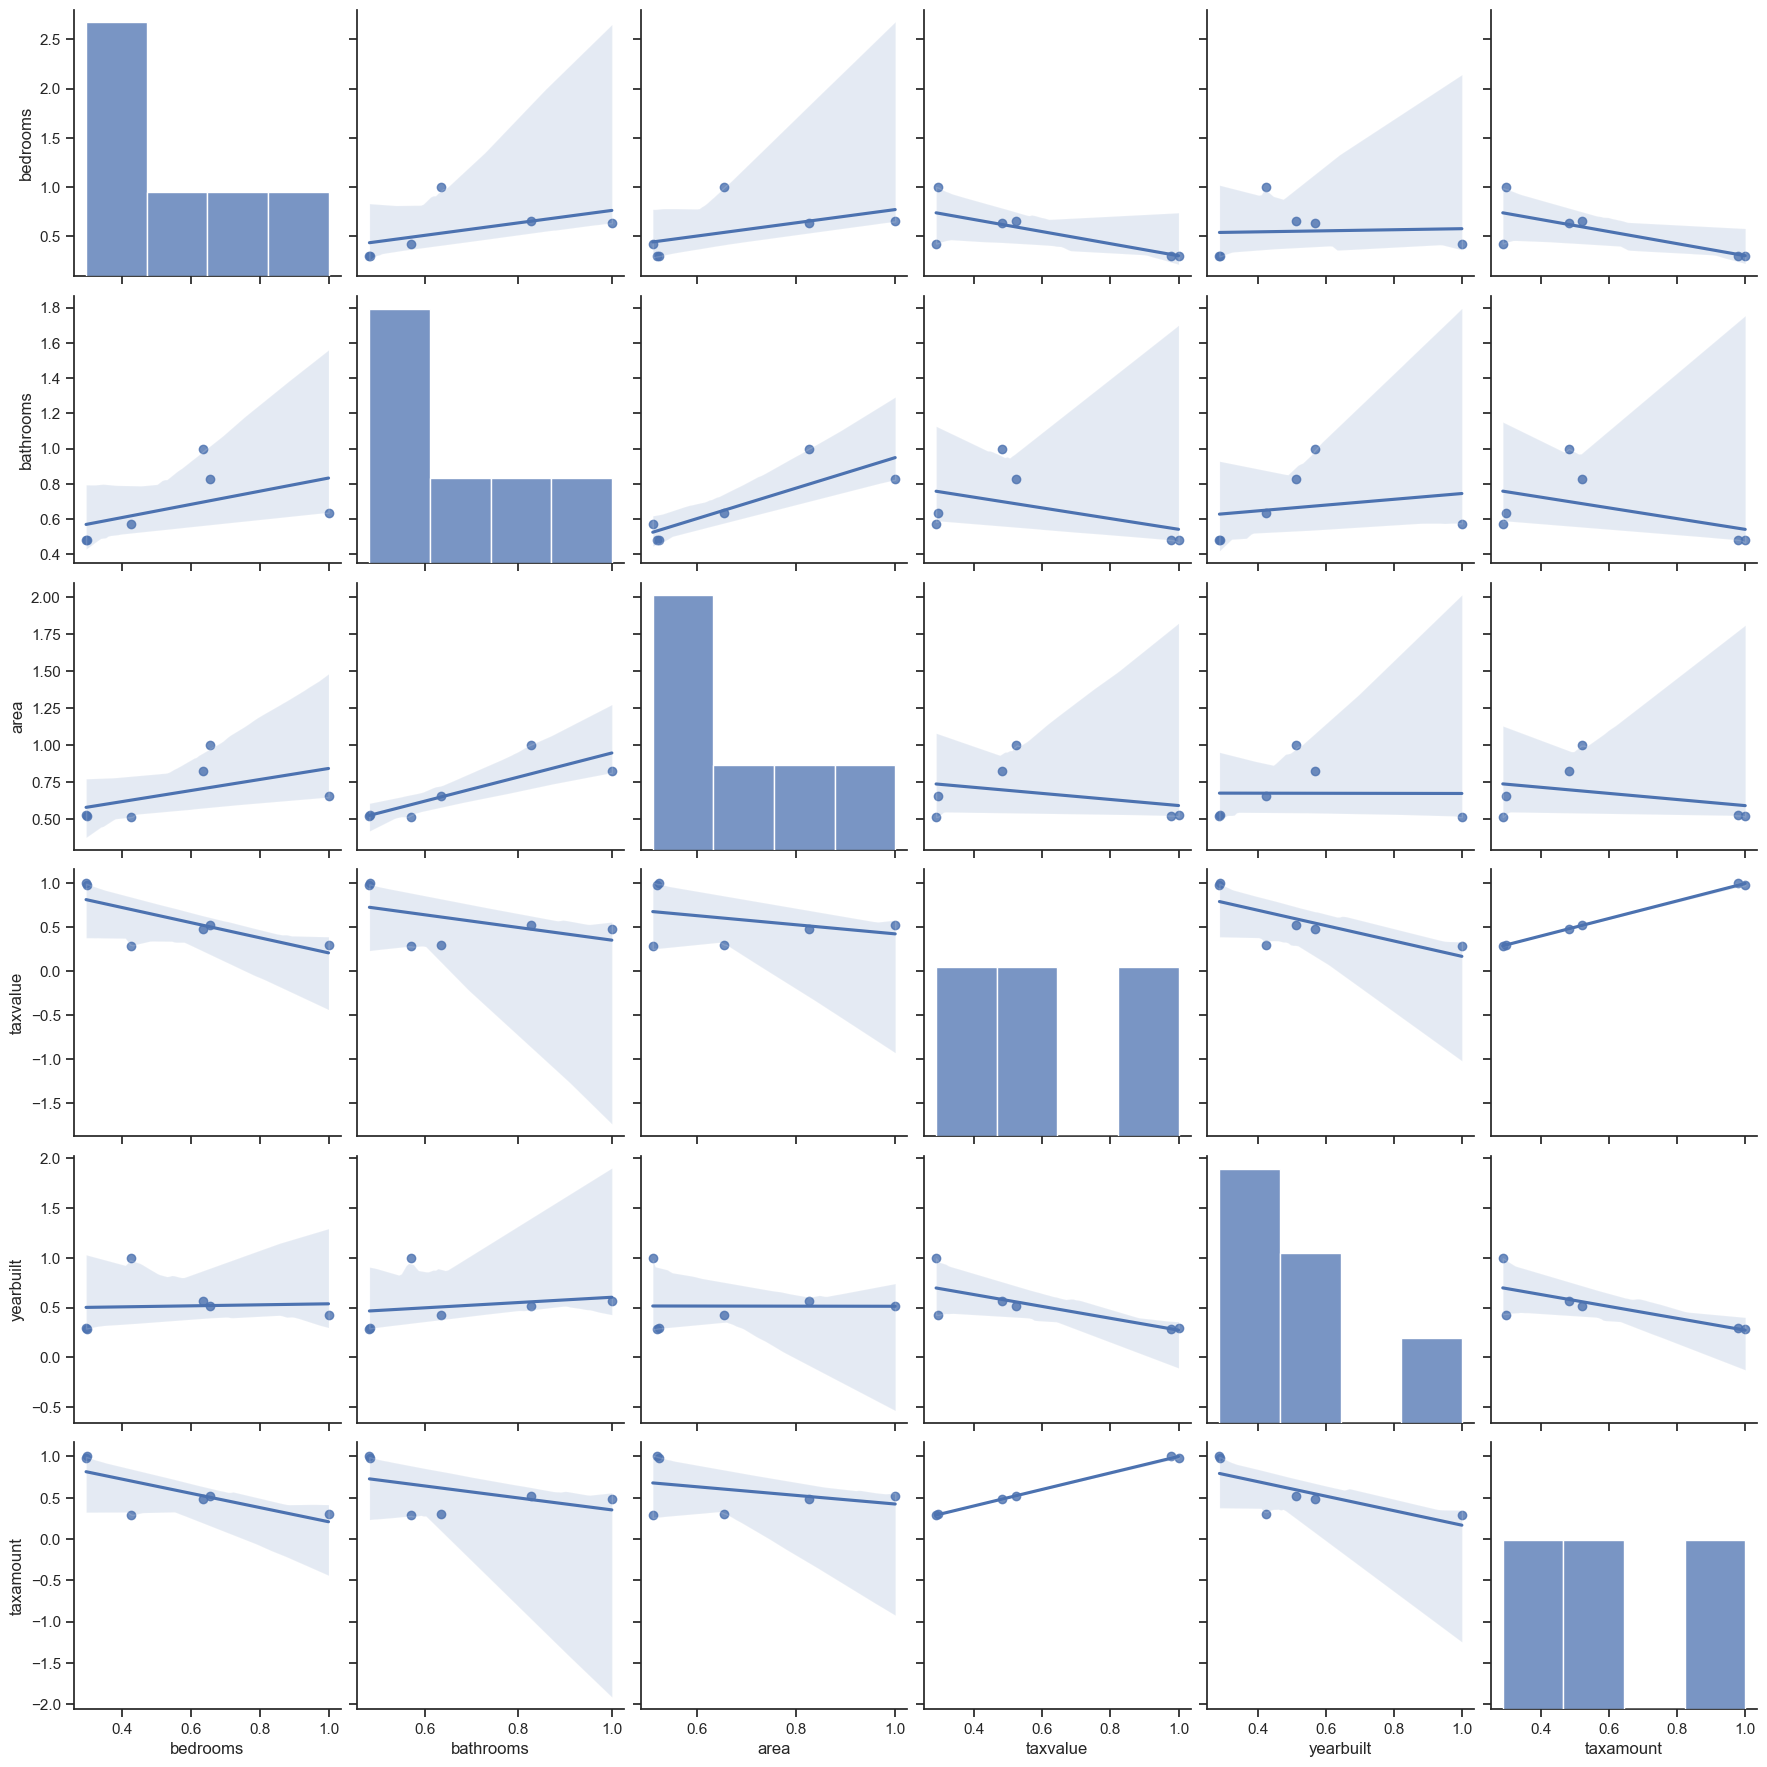

In [6]:
plot_variable_pairs(house_corr)

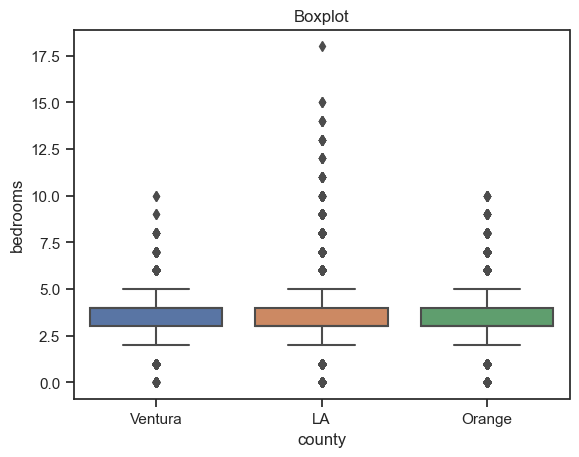

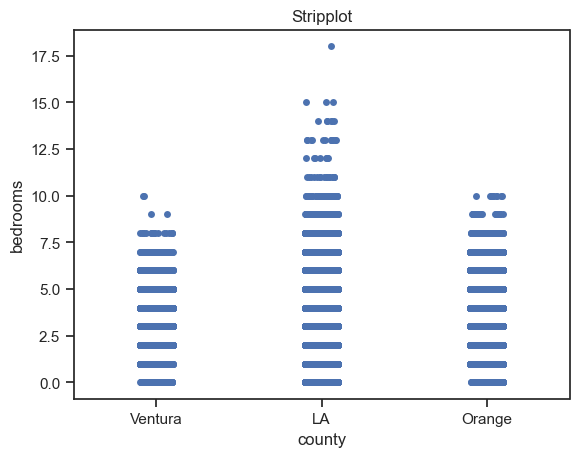

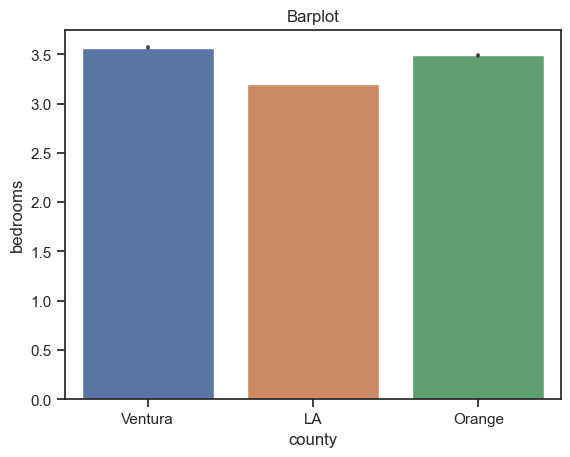

In [7]:
plot_categorical_and_continuous(train,train.county,train.bedrooms)